# Translating Madgwick's Gait tracking to python

Each python cell will represent a section on the original algorithm which can be found at `Script.m`

Before each python cell, a markdown one will comment the task of each block

In [8]:
# Select dataset
# (lines 8-21)

# leave the choosen dataset lines uncommented 

filePath = 'Datasets/straightLine'
startTime = 6
stopTime = 26

# filePath = 'Datasets/stairsAndCorridor'
# startTime = 5
# stopTime = 53

# filePath = 'Datasets/spiralStairs'
# startTime = 4
# stopTime = 47

In [9]:
# Import data
# (lines 23-24)

samplePeriod = 1/256

#the following procedure emulates what's happening inside the matlab class 'xIMUdataClass'

FileNameAppendage = '_CalInertialAndMag.csv'
GyroscopeUnits = '°/s'
AccelerometerUnits = 'g';
MagnetometerUnits = 'G';

#The pandas library makes it easy to manipulate the data in time series
import pandas as pd
data = pd.read_csv( filePath + FileNameAppendage ) 

# preview the loaded data
data.head()


Packet number  Gyroscope X (deg/s)  Gyroscope Y (deg/s)  \
0              3              -0.0625              -0.2500   
1              5              -0.0625              -0.2500   
2              6              -0.0625               0.0625   
3              8              -0.3750              -0.2500   
4              9              -0.0625               0.5625   

   Gyroscope Z (deg/s)  Accelerometer X (g)  Accelerometer Y (g)  \
0              -0.0625            -0.015137             0.030762   
1              -0.0625            -0.015137             0.030762   
2               0.0000            -0.046387             0.026855   
3              -0.3750            -0.046387             0.022949   
4               0.0625            -0.050293             0.042480   

   Accelerometer Z (g)  Magnetometer X (G)  Magnetometer Y (G)  \
0             0.971191            0.026855            0.025879   
1             0.971191            0.026855            0.025879   
2             0.967285            0.038574            0.025879   
3             0.979004            0.038574            0.025879   
4             0.971191            0.038574            0.025879   

   Magnetometer Z (G)  
0           -0.323730  
1           -0.323730  
2           -0.322266  
3           -0.322266  
4           -0.322266

### TODO: Manually frame data (lines 37-50)
Discard the rows outside the range `[startTime:stopTime)` and extract the discrete timeseries from the dataframe.
```matlab
# % startTime = 0;
# % stopTime = 10;

# indexSel = find(sign(time-startTime)+1, 1) : find(sign(time-stopTime)+1, 1);
# time = time(indexSel);
# gyrX = gyrX(indexSel, :);
# gyrY = gyrY(indexSel, :);
# gyrZ = gyrZ(indexSel, :);
# accX = accX(indexSel, :);
# accY = accY(indexSel, :);
# accZ = accZ(indexSel, :);
```


In [10]:
# Manually frame data(lines 37-50)

#time = ..
#gyrX = ..
#...


### TODO: Detect stationary periods (lines 52-72)

Compute the aceleration magnitudes

Apply Hi-pass and Low-pass filter to the magnitudes

Calculate the stationari periods by comparing the filtered magnitudes with a threshold

```matlab
% Compute accelerometer magnitude
acc_mag = sqrt(accX.*accX + accY.*accY + accZ.*accZ);

% HP filter accelerometer data
filtCutOff = 0.001;
[b, a] = butter(1, (2*filtCutOff)/(1/samplePeriod), 'high');
acc_magFilt = filtfilt(b, a, acc_mag);

% Compute absolute value
acc_magFilt = abs(acc_magFilt);

% LP filter accelerometer data
filtCutOff = 5;
[b, a] = butter(1, (2*filtCutOff)/(1/samplePeriod), 'low');
acc_magFilt = filtfilt(b, a, acc_magFilt);

% Threshold detection
stationary = acc_magFilt < 0.05;
```



In [11]:
# Detect stationary periods (lines 52-72)

#acc_mag = ..

#acc_magFilt = (apply HP filter)
#acc_magFilt = abs(acc_magFilt)

#acc_magFilt = (apply LP filter)

# stationary = acc_magFilt < 0.05


### TODO: Plot data raw sensor data and stationary periods (lines 74 - 100)

--> This is a checkpoint <--

Plot the data obtained, **it should match the original result in matlab**. Double check this step before moving forward!

```matlab
figure('Position', [9 39 900 600], 'NumberTitle', 'off', 'Name', 'Sensor Data');
ax(1) = subplot(2,1,1);
    hold on;
    plot(time, gyrX, 'r');
    plot(time, gyrY, 'g');
    plot(time, gyrZ, 'b');
    title('Gyroscope');
    xlabel('Time (s)');
    ylabel('Angular velocity (^\circ/s)');
    legend('X', 'Y', 'Z');
    hold off;
ax(2) = subplot(2,1,2);
    hold on;
    plot(time, accX, 'r');
    plot(time, accY, 'g');
    plot(time, accZ, 'b');
    plot(time, acc_magFilt, ':k');
    plot(time, stationary, 'k', 'LineWidth', 2);
    title('Accelerometer');
    xlabel('Time (s)');
    ylabel('Acceleration (g)');
    legend('X', 'Y', 'Z', 'Filtered', 'Stationary');
    hold off;
linkaxes(ax,'x');
```

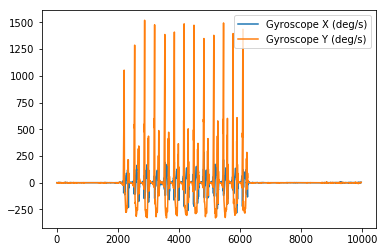

In [22]:
#  Plot data raw sensor data and stationary periods (lines 74 - 100)

# plotting data with pandas is easy. This is just an arbitrary example:
data[['Gyroscope X (deg/s)', 'Gyroscope Y (deg/s)']].plot(kind="line")


### TODO: Compute orientation (lines 102 - 124)

Obtain the orientation of the sensor in form of a quaternion applying the Madgwick sensor fusion filter.

This would be hard to translate to python, and it doesn't make much sense to do it since this data is already available within the chordata framework.

For the purpouses of developing the best thing to do is export the values calculated in matlab and import them at this point.

or perhaps this [translation of the madgwick AHRS algorithm](https://github.com/italogsfernandes/Gait-Tracking-With-x-IMU/tree/master/Python%20Gait%20Tracking) is useful at this step 

```matlab
quat = zeros(length(time), 4);
AHRSalgorithm = AHRS('SamplePeriod', 1/256, 'Kp', 1, 'KpInit', 1);

% Initial convergence
initPeriod = 2;
indexSel = 1 : find(sign(time-(time(1)+initPeriod))+1, 1);
for i = 1:2000
    AHRSalgorithm.UpdateIMU([0 0 0], [mean(accX(indexSel)) mean(accY(indexSel)) mean(accZ(indexSel))]);
end

% For all data
for t = 1:length(time)
    if(stationary(t))
        AHRSalgorithm.Kp = 0.5;
    else
        AHRSalgorithm.Kp = 0;
    end
    AHRSalgorithm.UpdateIMU(deg2rad([gyrX(t) gyrY(t) gyrZ(t)]), [accX(t) accY(t) accZ(t)]);
    quat(t,:) = AHRSalgorithm.Quaternion;
end
```

the result of this step should be a (n_of_samples x 4) dataframe containing the orientation quaternion for each sample

In [ ]:
# Compute the orientation 

# quat = (import data obtained in matlab)

# TODO

finish commenting the code...